#Testing Gait Cycle Extraction Method

The purpose of this notebook is to test our method for extracting gait cycles to determine how effective it is.

In [8]:
%matplotlib inline
%precision 3
import numpy as np
import scipy
import ReadCsvs as rc
import thinkstats2
import thinkplot
import GaitCycleFunc as gcf

In [3]:
AFO, PPAFO, Shoes=rc.ReadGaitData()

Sub001_6MW_AFO_0001.mat
Sub001_6MW_AFO_0002.mat
Sub001_6MW_AFO_0003.mat
Sub001_6MW_AFO_0004.mat
Sub001_6MW_AFO_0005.mat
Sub001_6MW_AFO_0006.mat
Sub001_6MW_AFO_0007.mat
Sub001_6MW_AFO_0008.mat
Sub001_6MW_AFO_0009.mat
Sub001_6MW_PPAFO_0001.mat
Sub001_6MW_PPAFO_0002.mat
Sub001_6MW_PPAFO_0003.mat
Sub001_6MW_PPAFO_0004.mat
Sub001_6MW_PPAFO_0005.mat
Sub001_6MW_PPAFO_0006.mat
Sub001_6MW_PPAFO_0007.mat
Sub001_6MW_PPAFO_0008.mat
Sub001_6MW_PPAFO_0009.mat
Sub001_6MW_Shoes_0001.mat
Sub001_6MW_Shoes_0002.mat
Sub001_6MW_Shoes_0003.mat
Sub001_6MW_Shoes_0004.mat
Sub001_6MW_Shoes_0005.mat
Sub001_6MW_Shoes_0006.mat
Sub001_6MW_Shoes_0007.mat
Sub001_6MW_Shoes_0008.mat
Sub001_6MW_Shoes_0009.mat
Sub002_6MW_AFO_0001.mat
Sub002_6MW_AFO_0002.mat
Sub002_6MW_AFO_0003.mat
Sub002_6MW_AFO_0004.mat
Sub002_6MW_AFO_0005.mat
Sub002_6MW_AFO_0006.mat
Sub002_6MW_AFO_0007.mat
Sub002_6MW_AFO_0008.mat
Sub002_6MW_AFO_0009.mat
Sub002_6MW_PPAFO_0001.mat
Sub002_6MW_PPAFO_0002.mat
Sub002_6MW_PPAFO_0003.mat
Sub002_6MW_PPAFO_0004.

###Test Symmetry Based on Gait Cycles

[[316, 10764.750256666588], [530, 10710.027464851344]] [1.7750000000000001, 2.8450000000000002] [63.107387008664119, 59.41376715632569]


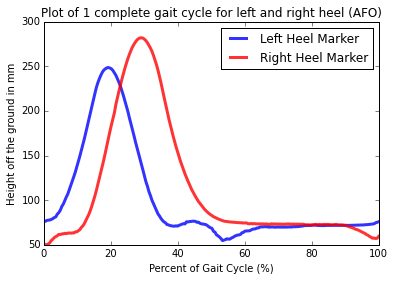

0.495

In [79]:
data=[AFO, PPAFO, Shoes]
pnum = 12
trial = 5
axis = 'z'
marker = 'R_HEEL'

def CycleSet(x, data, pnum, trial, axis, marker):
    
    if x == "AFO":
        cycle_set_afo=gcf.CycleExtract('AFO', data, pnum, trial, axis, marker, False, False)
        
        for i in range(len(cycle_set_afo)):
            index, cycle=cycle_set_afo[i]
            lheeldata_afo=cycle['L_HEEL']
            rheeldata_afo=cycle['R_HEEL']
    
            percent=np.linspace(0,100, len(index))
    
            thinkplot.Plot(percent, lheeldata_afo, label='Left Heel Marker', color='blue')
            thinkplot.Plot(percent[::-1], rheeldata_afo, label='Right Heel Marker', color='red')
            thinkplot.Show(legend=True, xlabel='Percent of Gait Cycle (%)', ylabel='Height off the ground in mm', title='Plot of 1 complete gait cycle for left and right heel (AFO)')

        corr_afo=thinkstats2.Corr(lheeldata_afo, rheeldata_afo[::-1])
        return corr_afo
            
    if x =="PPAFO":
        cycle_set_ppafo=gcf.CycleExtract('PPAFO', data, pnum, trial, axis, marker, False, False)
        
        for i in range(len(cycle_set_ppafo)):
            index, cycle=cycle_set_ppafo[i]
            lheeldata_ppafo=cycle['L_HEEL']
            rheeldata_ppafo=cycle['R_HEEL']
    
            percent=np.linspace(0,100, len(index))
    
            thinkplot.Plot(percent, lheeldata_ppafo, label='Left Heel Marker', color='blue')
            thinkplot.Plot(percent[::-1], rheeldata_ppafo, label='Right Heel Marker', color='red')
            thinkplot.Show(legend=True, xlabel='Percent of Gait Cycle (%)', ylabel='Height off the ground in mm', title='Plot of 1 complete gait cycle for left and right heel (PPAFO)')

        corr_ppafo=thinkstats2.Corr(lheeldata_ppafo, rheeldata_ppafo[::-1])
        return corr_ppafo
    
    else:
        cycle_set_shoes=gcf.CycleExtract('Shoes', data, pnum, trial, axis, marker, False, False)
        
        for i in range(len(cycle_set_shoes)):
            index, cycle=cycle_set_shoes[i]
            lheeldata_shoes=cycle['L_HEEL']
            rheeldata_shoes=cycle['R_HEEL']
    
            percent=np.linspace(0,100, len(index))
    
            thinkplot.Plot(percent, lheeldata_shoes, label='Left Heel Marker', color='blue')
            thinkplot.Plot(percent[::-1], rheeldata_shoes, label='Right Heel Marker', color='red')
            thinkplot.Show(legend=True, xlabel='Percent of Gait Cycle (%)', ylabel='Height off the ground in mm', title='Plot of 1 complete gait cycle for left and right heel (Shoes)')
    
        corr_shoes=thinkstats2.Corr(lheeldata_shoes, rheeldata_shoes[::-1])
        return corr_shoes
        
#     print rheeldata
#     rheeldata_rev=rheeldata[::-1]
#     print rheeldata_rev

    # thinkplot.Scatter(lheeldata_afo, rheeldata_afo[::-1], alpha=0.2)
    # thinkplot.Show(legend=True, xlabel= 'Left Heel Height (mm)', ylabel='Right Heel Height (mm)', title='Plot of left and right heel height (AFO)')

    # thinkplot.Scatter(lheeldata_ppafo, rheeldata_ppafo[::-1], alpha=0.2)
    # thinkplot.Show(legend=True, xlabel= 'Left Heel Height (mm)', ylabel='Right Heel Height (mm)', title='Plot of left and right heel height (PPAFO)')

    # thinkplot.Scatter(lheeldata_shoes, rheeldata_shoes[::-1], alpha=0.2)
    # thinkplot.Show(legend=True, xlabel= 'Left Heel Height (mm)', ylabel='Right Heel Height (mm)', title='Plot of left and right heel height (Shoes)')

    
    
    

#     print "AFO Correlation=", corr_afo
#     print "PPAFO Correlation=", corr_ppafo
#     print "Shoes Correlation=", corr_shoes
#     return corr_afo, corr_ppafo, corr_shoes

CycleSet('AFO', data, pnum, trial, axis, marker)

In [40]:
# thinkplot.Scatter(lheeldata_afo, rheeldata_afo[::-1], alpha=0.2)
# thinkplot.Show(legend=True, xlabel= 'Left Heel Height (mm)', ylabel='Right Heel Height (mm)', title='Plot of left and right heel height (AFO)')

# thinkplot.Scatter(lheeldata_ppafo, rheeldata_ppafo[::-1], alpha=0.2)
# thinkplot.Show(legend=True, xlabel= 'Left Heel Height (mm)', ylabel='Right Heel Height (mm)', title='Plot of left and right heel height (PPAFO)')

# thinkplot.Scatter(lheeldata_shoes, rheeldata_shoes[::-1], alpha=0.2)
# thinkplot.Show(legend=True, xlabel= 'Left Heel Height (mm)', ylabel='Right Heel Height (mm)', title='Plot of left and right heel height (Shoes)')


In [58]:
# corr_afo=thinkstats2.Corr(lheeldata_afo, rheeldata_afo[::-1])
# corr_shoes=thinkstats2.Corr(lheeldata_shoes, rheeldata_shoes[::-1])
# corr_ppafo=thinkstats2.Corr(lheeldata_ppafo, rheeldata_ppafo[::-1])

# print "AFO Correlation=", corr_afo
# print "PPAFO Correlation=", corr_ppafo
# print "Shoes Correlation=", corr_shoes

### Heel Symmetry Hypothesis Test

In [80]:

class HeelSymHT(thinkstats2.HypothesisTest):
    """
    Defines the knee angle hypothesis test class that inherits from the hypothesis test class from thinkstats2
    
    """
    
    def TestStatistic(self, data):
        """
        Defines the test statistic method required by the hypothesis test parent class
        In this implementation, it simply computes the difference between means
        
        data: tuple of two sequences, one for each of the two groups being compared
        
        returns: the difference between the means for the two groups (i.e. group1mean - group2mean)
        """
        
        raw_group1, raw_group2 = data
        
        group1=np.asarray(raw_group1)
        group2=np.asarray(raw_group2)
        
        test_stat=group1.mean()-group2.mean()
        return test_stat
    
    def MakeModel(self):
        """
        Defines the MakeModel method required by the hypothesis test parent class
        In this implementation, it simply stacks the data for each of the two groups, one on top of the other
        
        Does not return anything; Adds the stacked data to the pool attribute
        """
        
        group1, group2 = self.data
        self.n, self.m=len(group1), len(group2)
        self.pool=np.hstack((group1, group2))
        
        #print "group1len=", len(group1)
        #print "group2len=",len(group2)
        #print "poollen=",len(self.pool)
        
    def RunModel(self):
        np.random.shuffle(self.pool)
        data=self.pool[:self.n], self.pool[self.n:]
        return data
        

def HeelSymHypTest(Raw_data1, Raw_data2):
    """    
    Raw_data1: Sequence of data for group 1
    Raw_data2: Sequence of data for group 2
    
    returns: pvalue of the hypothesis test
    """
    
    data1 = Raw_data1[~np.isnan(Raw_data1)]
    data2 = Raw_data2[~np.isnan(Raw_data2)]
    data=(data1, data2)
    
    ht=HeelSymHT(data)
    print "Actual Observed Effect Size=", ht.actual

    pvalue=ht.PValue()

    return pvalue
    
def HeelSymHypTest_General(data, pnum, trial, axis, marker):
    """
    This function is the generalized version of the HeelSymHypTest that carries out the heel symmetry hypothesis test and returns the pvalue
    
    AFO: Data Dictionary for the AFO condition
    PPAFO: Data Dictionary for the PPAFO condition
    Shoes: Data Dictionary for the Shoes condition
    pnum: integer for participant number
    trial: integer specifying the trial number
    
    returns: pvalue of the hypothesis test
    """
    print pnum, trial, axis, marker
    
    Raw_data1= CycleSet('AFO', data, pnum, trial, axis, marker)
    Raw_data2= CycleSet('PPAFO', data, pnum, trial, axis, marker)
    
#     data1 = Raw_data1[~np.isnan(Raw_data1)]
#     data2 = Raw_data2[~np.isnan(Raw_data2)]
    data1, data2 = (Raw_data1, Raw_data2)
    data=(data1, data2)
    print data

    #print AFO_angle
    data=(data1, data2)
    ht=HeelSymHT(data)
    print "Actual Observed Effect Size=", ht.actual

    pvalue=ht.PValue()
    return pvalue

In [83]:
print HeelSymHypTest_General(['AFO', 'PPAFO', 'Shoes'], 1, 5, 'z', 'R_HEEL')

1 5 z R_HEEL


AttributeError: 'str' object has no attribute 'GetTrial'

In [76]:
data = ['AFO', 'PPAFO', 'Shoes']
t=dict()
for participant in AFO.keys():
    afo_keys=AFO[participant].trials.keys()
    ppafo_keys=PPAFO[participant].trials.keys()
    shoes_keys=Shoes[participant].trials.keys()
    overlap=set(afo_keys) & set(ppafo_keys) & set(shoes_keys)
#     print 'ppafo=', ppafo_keys
    
    if overlap:
        for eachtrial in overlap:
            if eachtrial>3:
                print "Participant=", participant
                print 'trial=', eachtrial
                result= HeelSymHypTest_General(data, participant, eachtrial, 'z', 'R_HEEL')
                t[(participant, eachtrial)]=result
        

Participant= 1
trial= 4
1 4 z R_HEEL


AttributeError: 'str' object has no attribute 'GetTrial'